In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [74]:
ds=pd.read_csv("C:\\jain.txt",delimiter = "\t",header=None)

In [75]:
ds

,0,1,2
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2
...,...,...,...
368,38.75,16.85,1
369,39.00,16.60,1
370,38.25,17.35,1
371,39.50,16.95,1


In [76]:
ds1 = ds.iloc[:,0:2]
Arr = np.array(ds1)

Text(0, 0.5, 'Y')

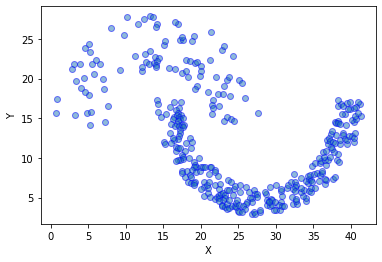

In [77]:
plt.scatter(Arr[:,0], Arr[:,1], alpha=0.5, edgecolors='blue')
plt.xlabel('X')
plt.ylabel('Y')

In [78]:
from sklearn.metrics import pairwise_distances
W = pairwise_distances(Arr, metric="euclidean")
vectorizer = np.vectorize(lambda x: 1 if x < 5 else 0)
W = np.vectorize(vectorizer)(W)
print(W)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [79]:
D_M = np.diag(np.sum(np.array(W), axis=1))
print('Degree Matrix:')
print(D_M)


Degree Matrix:
[[12  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]
 ...
 [ 0  0  0 ... 35  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 37]]


In [80]:
L_M = D_M - W
print('Laplacian Matrix:')
print(L_M)

Laplacian Matrix:
[[11 -1 -1 ...  0  0  0]
 [-1  9 -1 ...  0  0  0]
 [-1 -1 13 ...  0  0  0]
 ...
 [ 0  0  0 ... 34 -1 -1]
 [ 0  0  0 ... -1 39 -1]
 [ 0  0  0 ... -1 -1 36]]


In [81]:
e_value, e_vector = np.linalg.eig(L_M)
print('eigenvalues:')
print(e_value)

eigenvalues:
[4.99600361e-15 3.00263178e-01 1.00451701e+00 2.54488061e+00
 3.74874871e+00 5.57695017e+00 6.59702218e+00 7.48029823e+00
 8.01987524e+00 8.21436844e+00 9.83257319e+00 1.03892858e+01
 1.05758993e+01 1.11682436e+01 1.13839996e+01 1.23469480e+01
 1.30124772e+01 1.39054479e+01 1.39747675e+01 1.41780490e+01
 1.48339311e+01 1.52099502e+01 1.52411345e+01 1.53818900e+01
 1.57192529e+01 1.59833839e+01 1.64437654e+01 1.62302104e+01
 1.67379031e+01 1.69518171e+01 1.71155816e+01 1.72340120e+01
 1.76474932e+01 1.79049769e+01 1.80277275e+01 1.81375901e+01
 1.82394463e+01 1.87096217e+01 1.94048949e+01 1.93390065e+01
 1.99291499e+01 8.93734758e+01 2.74160320e+01 2.02710944e+01
 2.02337568e+01 2.05257752e+01 2.07368506e+01 2.09168994e+01
 2.11984639e+01 2.12600028e+01 2.16625057e+01 2.17334785e+01
 2.23535520e+01 2.21137233e+01 2.27464545e+01 2.39050706e+01
 2.34603647e+01 2.31655304e+01 2.32671233e+01 2.61302898e+01
 2.59993708e+01 2.55475282e+01 2.46066055e+01 2.49008281e+01
 2.51396648

In [82]:
print('eigenvectors:')
print(e_vector)

eigenvectors:
[[ 5.17780373e-02  1.88877319e-01 -7.23443475e-02 ...  1.28215783e-19
  -7.28537912e-20  1.13910309e-19]
 [ 5.17780373e-02  1.92559780e-01 -7.76433510e-02 ... -1.64415660e-18
  -4.77415324e-18 -4.99163377e-18]
 [ 5.17780373e-02  1.89545818e-01 -7.36321639e-02 ... -3.89991623e-18
   5.41401410e-18  2.67560255e-17]
 ...
 [ 5.17780373e-02 -2.86057944e-02 -5.70751317e-02 ...  4.25788440e-17
  -5.75348008e-16 -3.76505938e-16]
 [ 5.17780373e-02 -2.85451416e-02 -5.66646494e-02 ... -1.25622510e-16
   1.09446888e-15 -3.07338310e-17]
 [ 5.17780373e-02 -2.85857226e-02 -5.69384949e-02 ... -1.98078277e-16
   2.97403590e-16  8.53506899e-16]]


In [83]:
np.where(e_value == np.partition(e_value, 1)[1])

(array([1], dtype=int64),)

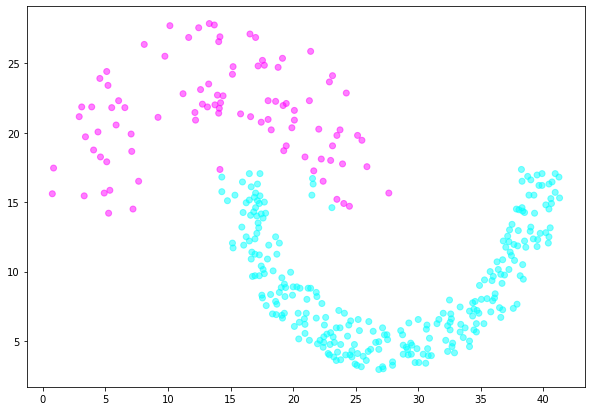

In [84]:
y_spec =e_vector[:,1].copy()
y_spec[y_spec < 0] = 0
y_spec[y_spec > 0] = 1
type(y_spec),y_spec.shape


fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(Arr[:, 0], Arr[:, 1],c=y_spec, alpha=0.5, cmap='cool')
plt.show()

In [85]:
yint_spec=y_spec.astype(int)
yint_spec

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [86]:
e=[]
for i in yint_spec:
    if i==1:
        e.append(2)
    else:
        e.append(1)

In [87]:
ds['3']=e

In [88]:
ds_mod=ds[ds[2]==ds['3']]

In [89]:
ds_mod

,0,1,2,3
0,0.85,17.45,2,2
1,0.75,15.60,2,2
2,3.30,15.45,2,2
3,5.25,14.20,2,2
4,4.90,15.65,2,2
...,...,...,...,...
368,38.75,16.85,1,1
369,39.00,16.60,1,1
370,38.25,17.35,1,1
371,39.50,16.95,1,1


In [90]:
accuracy=len(ds_mod)/(len(ds))
print("The accuracy is", accuracy*100)

The accuracy is 98.65951742627345
